Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.A single cell estimate of the population 16+ for each state.
2.Controls for Hispanic Origin by age and sex.
3.Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
df.shape

(32560, 15)

The dataset Contains 32560 rows and 15 columns where 14 are independent variables and 1 is target variable

In [26]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

This dataset contains two types of data:object and int64

In [27]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From the above we can see that we have no missing values present in our dataset lets check with heatmnap as well

<Axes: >

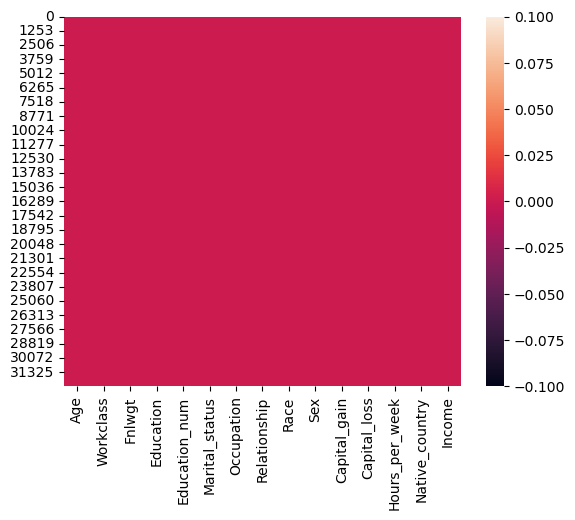

In [28]:
sns.heatmap(df.isnull())

From the above heatmap it is clear that there are no missing values present in our dataset

In [29]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [30]:
df.duplicated().sum()

24

In [31]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
df=df.drop_duplicates()
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Here the columns capital gain and capital loss play no role in our prediction, so dropping them

In [35]:
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

The columns Workclass, Occupation and Native_country have '?' sign so we need to fill this 

In [36]:
df['Workclass'] =df.Workclass.str.replace('?','Private')
df['Occupation'] =df.Occupation.str.replace('?','Prof-speciality')
df['Native_country'] =df.Native_country.str.replace('?','United-States')

In [37]:
df['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [38]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Prof-speciality      1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [39]:
df['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [40]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov' ],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc' ],' Pvt-Sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [41]:
df["Workclass"].value_counts()

 Pvt-Sector     28165
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [42]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [43]:
df["Education"].value_counts()

 High-School         11070
 Secondary-School     9731
 Under_Graduation     5352
 School               4248
 Post_Graduation      1722
 PhD                   413
Name: Education, dtype: int64

In [44]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [45]:
df["Marital_status"].value_counts()

 Married    14993
 Single     10666
 Others      6877
Name: Marital_status, dtype: int64

In [46]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-Sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-Sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-Sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-Sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [47]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [48]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,40.440343
std,13.638193,1.055563e+05,2.571622,12.347079
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


From the above we observe that:
1.The count is same for all the columns which means there is no missing values present in our dataset
2.The mean is greater than the meadian(50%) in some columns which means data is skewed to right for these columns
3.The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
4.There is a huge difference in 75% and max which shows huge outliers present in the columns

In [49]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [50]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Univarient Analysis

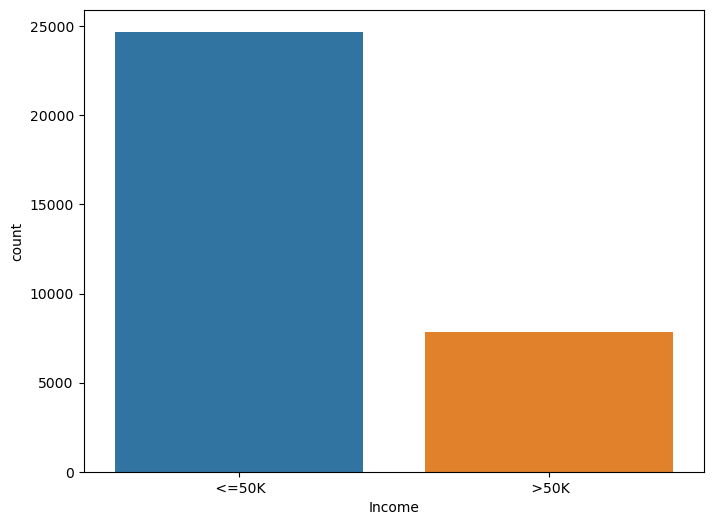

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Income'])
plt.show()

From the above plot we see that most of the people have income less than or equal to 50k 

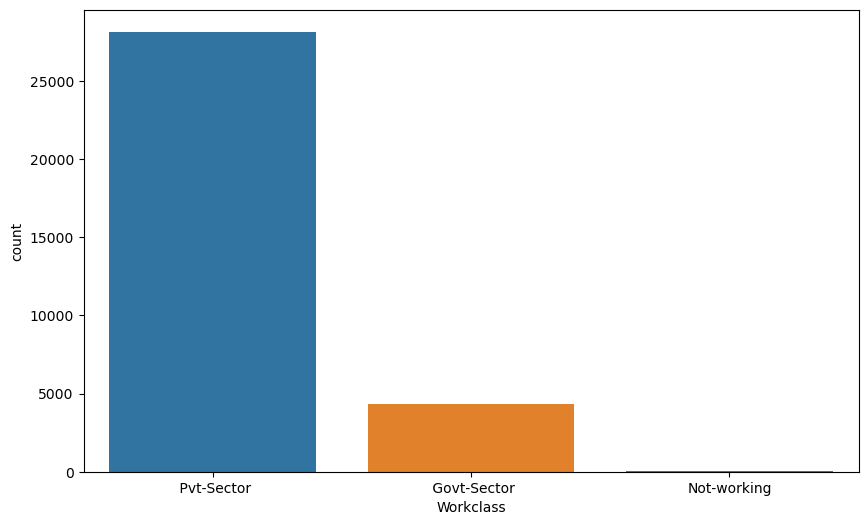

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Workclass'])
plt.show()

From the above we see that he count of Private working class is high compared to others

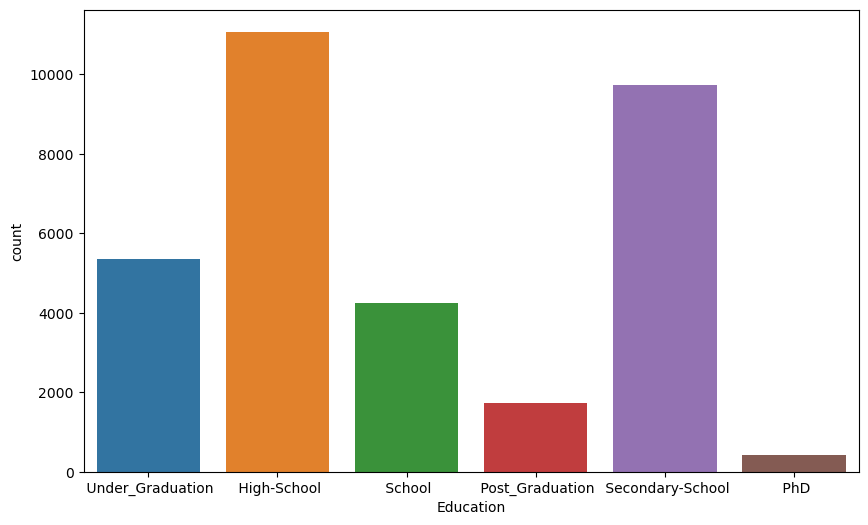

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Education'])
plt.show()

From the above plot we see that the count of High-School is high followed by Secondary_School

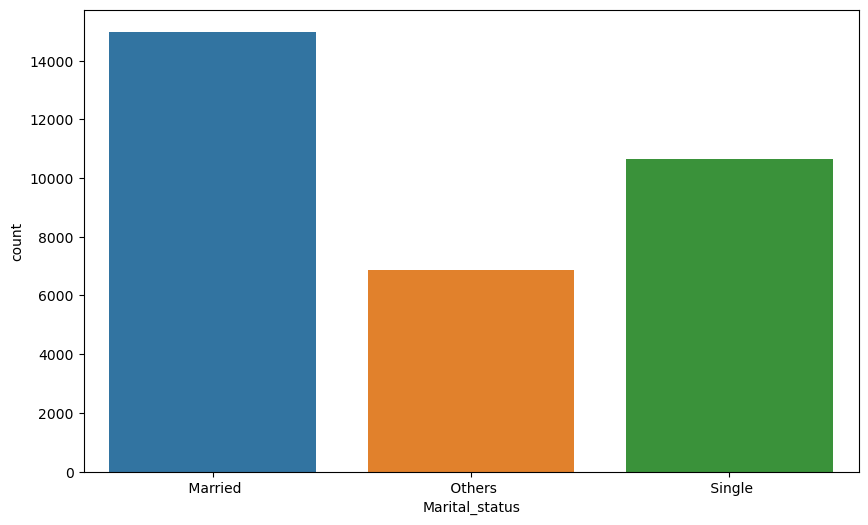

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Marital_status"])
plt.show()

From the above plot we see that people who got married have high count followed by the singles and never married people

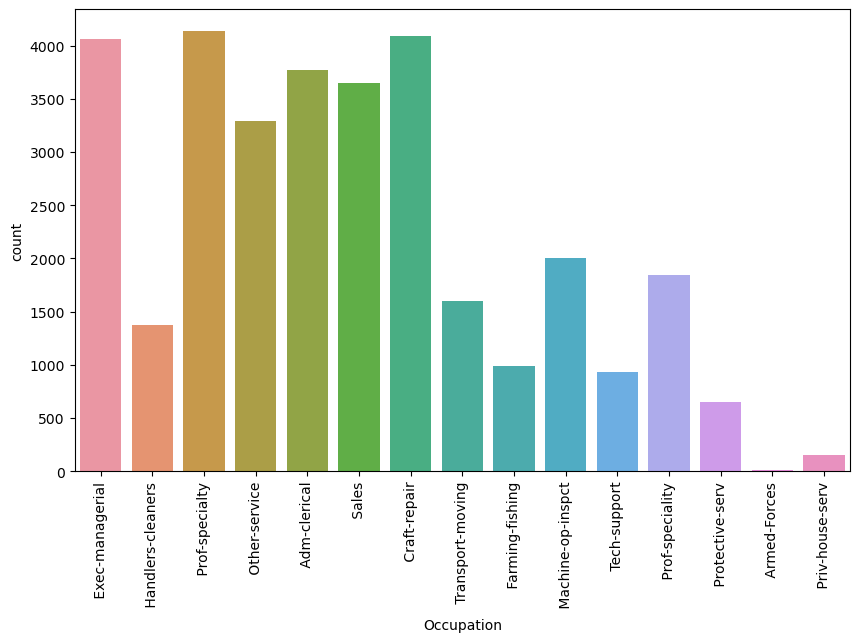

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Occupation"])
plt.xticks(rotation=90)
plt.show()

From the above plot it clear that people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts

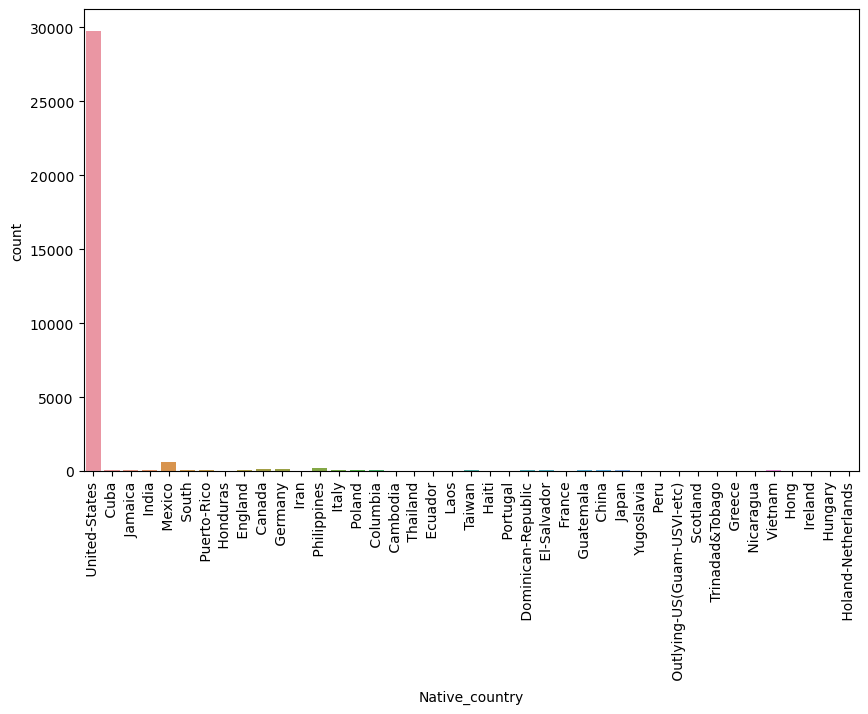

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Native_country'])
plt.xticks(rotation=90)
plt.show()

From the above plot we can see that United States country has highest count of around 29k compared to other countries

BiVarient Analysis

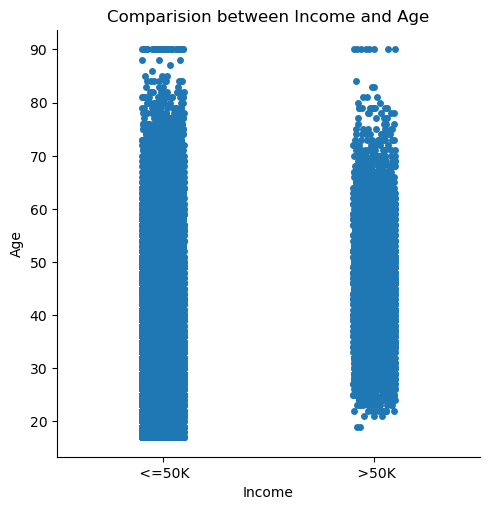

In [57]:
sns.catplot(x=df['Income'],y=df['Age'], data=df)
plt.title('Comparision between Income and Age')
plt.show()

From the above plot it is clear that the people whose age is between 20 to 80 have annual income more than 50k

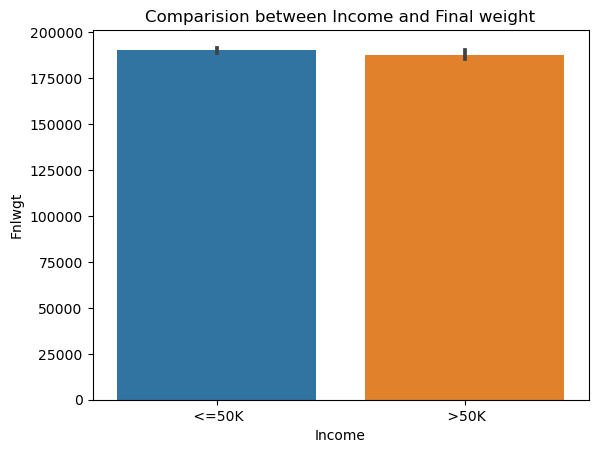

In [58]:
sns.barplot(x=df['Income'],y=df['Fnlwgt'], data=df)
plt.title('Comparision between Income and Final weight')
plt.show()

From the above plot we can see that there is no significant relation between final weight and income of the people

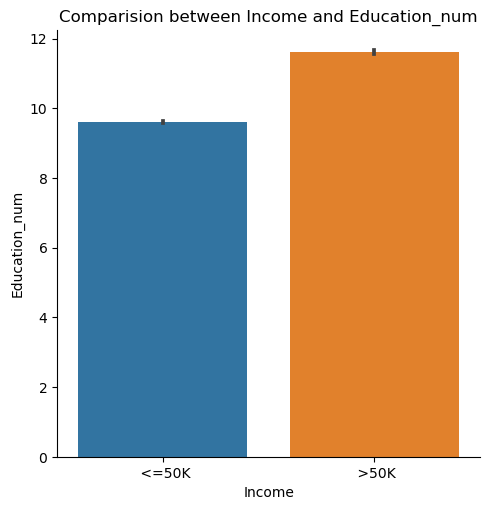

In [59]:
sns.catplot(x='Income',y='Education_num', data=df,kind='bar')
plt.title("Comparision between Income and Education_num")
plt.show()

From the above graph we observe that Income is more than 50k for the people having high education number 

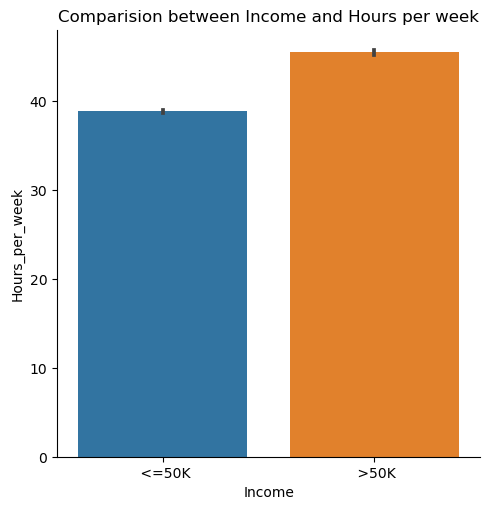

In [60]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar')
plt.title('Comparision between Income and Hours per week')
plt.show()

From the above plot we see that the income is related to the hours per week ,the income is >50k when the Hours are high

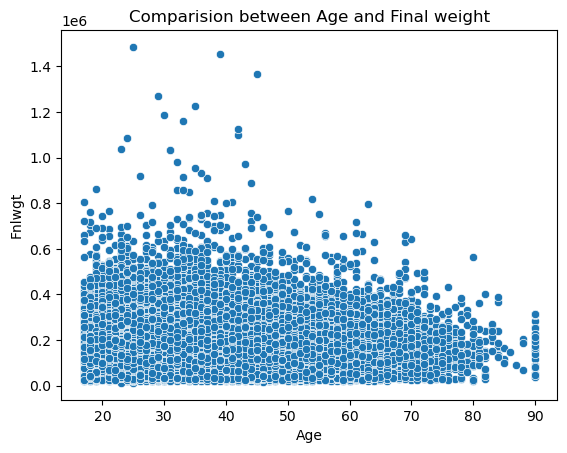

In [61]:
sns.scatterplot(x='Age',y='Fnlwgt', data=df)
plt.title('Comparision between Age and Final weight')
plt.show()

From the above plot we see that the people age between 17-80 have income <=50k

<Figure size 1000x600 with 0 Axes>

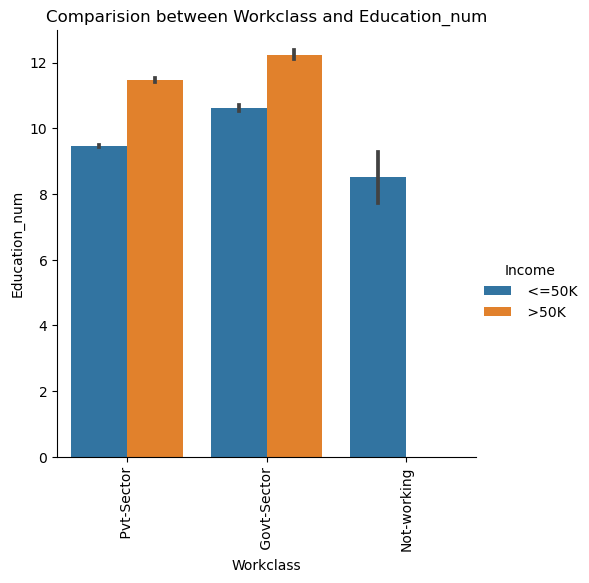

In [62]:
plt.figure(figsize=(10,6))
sns.catplot(x='Workclass',y='Education_num',data=df,kind='bar',hue='Income');
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

It is clear from the graph that people in the position of government jobs with high education number have the income >50k also the people in the Private sector position with average education number have second highest income >50k

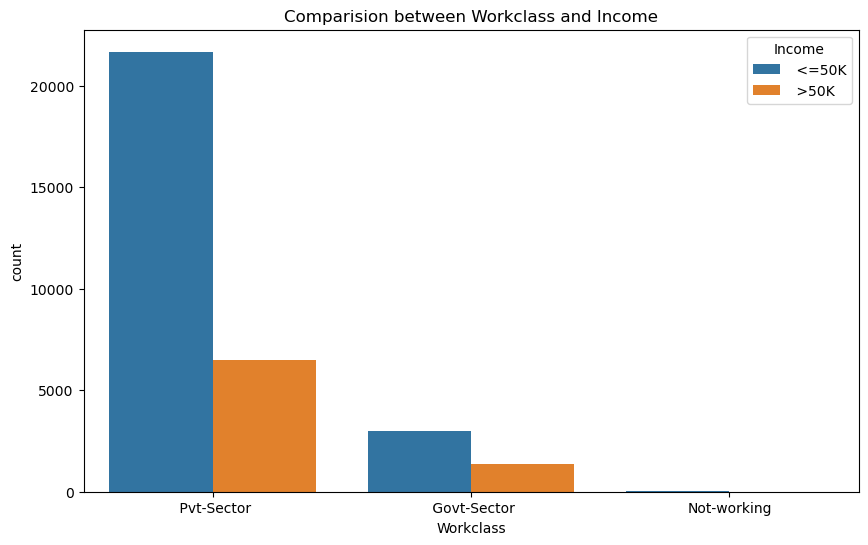

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Workclass'],hue=df['Income'])
plt.title('Comparision between Workclass and Income')
plt.show()

From the above graph we observe that people who are working in the private sectors have the income <=50k an only few of them in the same sector have income >50k .
also people who never worked they don't have the income

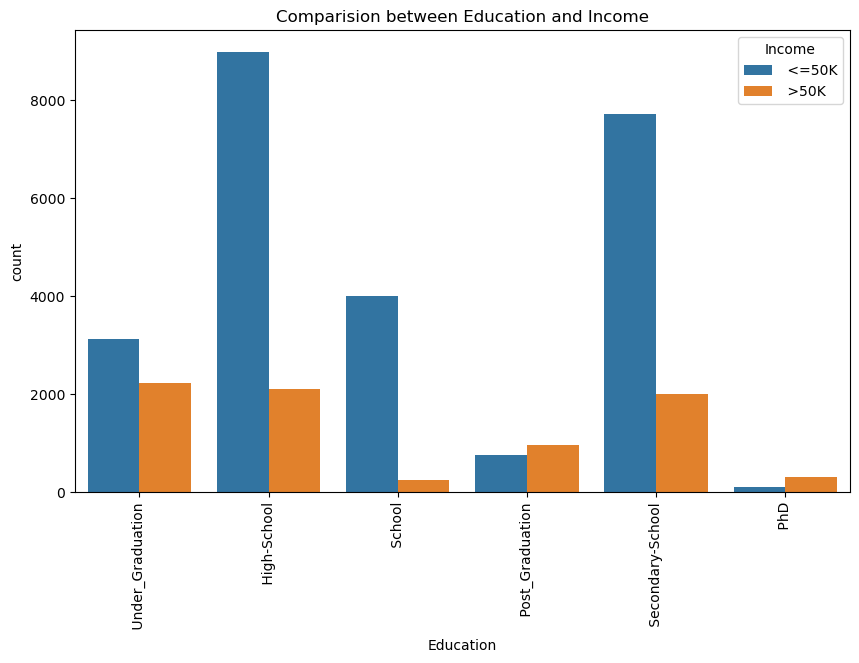

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Education'],hue=df['Income'])
plt.title('Comparision between Education and Income')
plt.xticks(rotation=90)
plt.show()

From the above plot it is clear that the people who completed their high school have income <=50k followed by the people who did Secondary School,
also people who had done their Graduatuion they are earning more income that is >50k

<Figure size 1000x600 with 0 Axes>

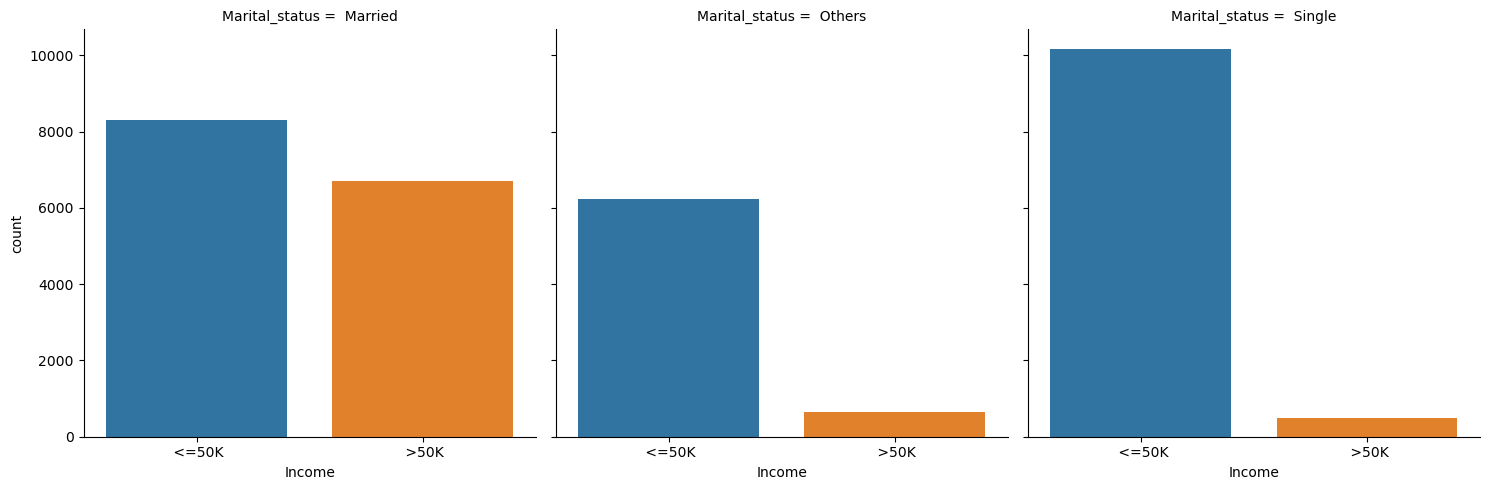

In [65]:
plt.figure(figsize=(10,6))
sns.catplot(x='Income', col='Marital_status',data=df,kind='count')
plt.show()

From the above plot it is clear that people who are married have income >50k compare to others,the people who are singles are earning <=50k income

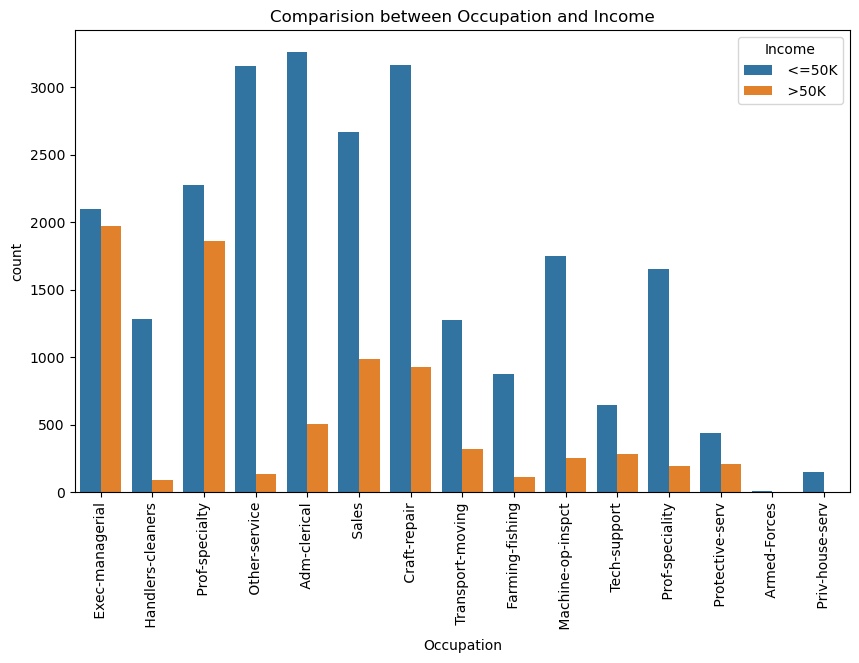

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Occupation'],hue=df['Income'])
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

From the above plot we see that the people in the position of Prof-speciality and Exce-managerial have the income more than 50k also the people who are in Other sevices, Adm-clerical and craft repair they have income less than 50k

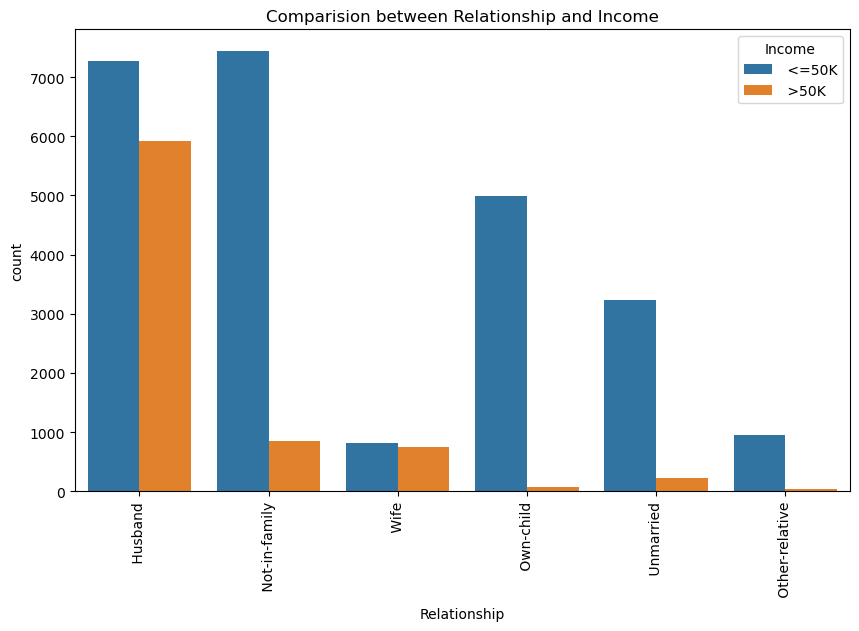

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Relationship'],hue=df['Income'])
plt.title('Comparision between Relationship and Income')
plt.xticks(rotation=90)
plt.show()

From the above plot we observe that People who have the relationship of husband and wife have income >50k and the other relationship have income <=50k

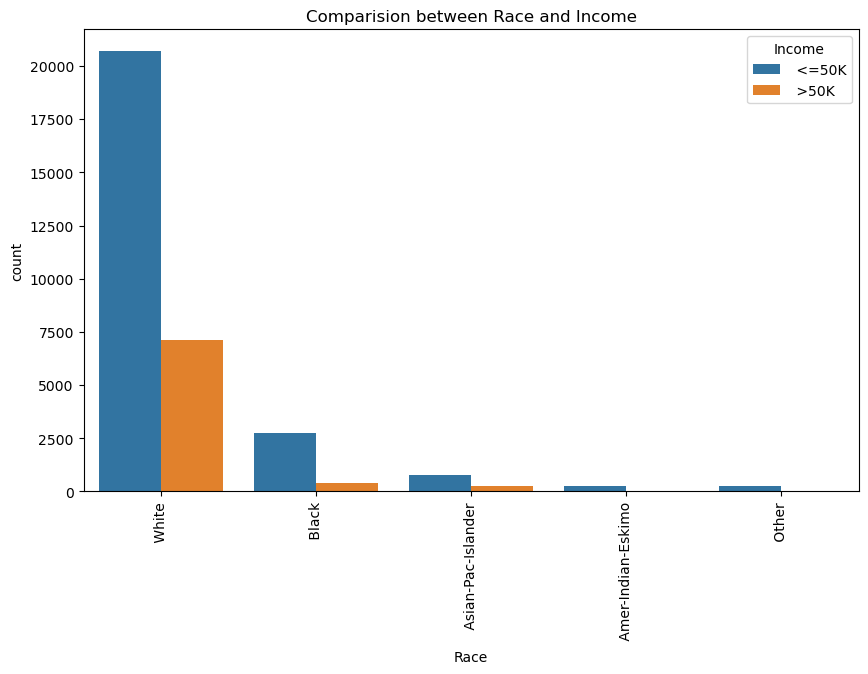

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Race'],hue=df['Income'],data=df)
plt.title('Comparision between Race and Income')
plt.xticks(rotation=90)
plt.show()

From the above plot we see that the White family groups have high income >50k 

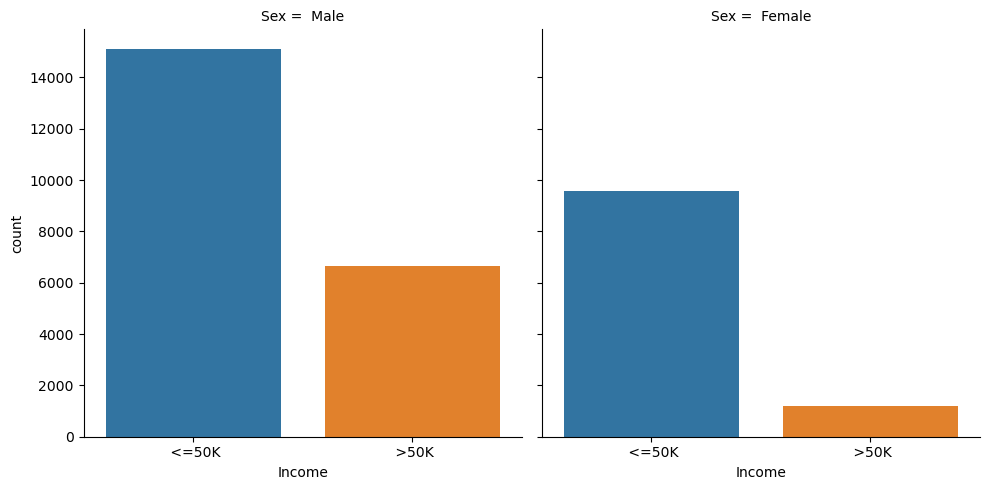

In [69]:
sns.catplot(x='Income',col='Sex',data=df,kind='count')
plt.show()

From the above plot we see that The income of Male is above 50k as compared to the female

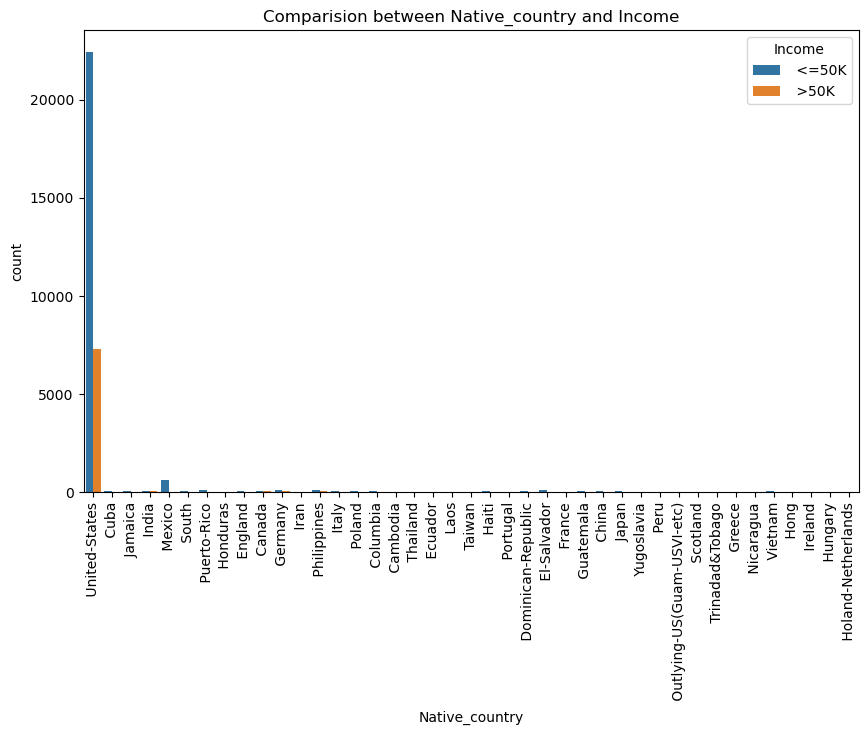

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Native_country'],hue=df['Income'])
plt.title('Comparision between Native_country and Income')
plt.xticks(rotation=90)
plt.show()

From the above plot it is clear that United States is earning more income compared to all the other countries

MultiVarient Analysis

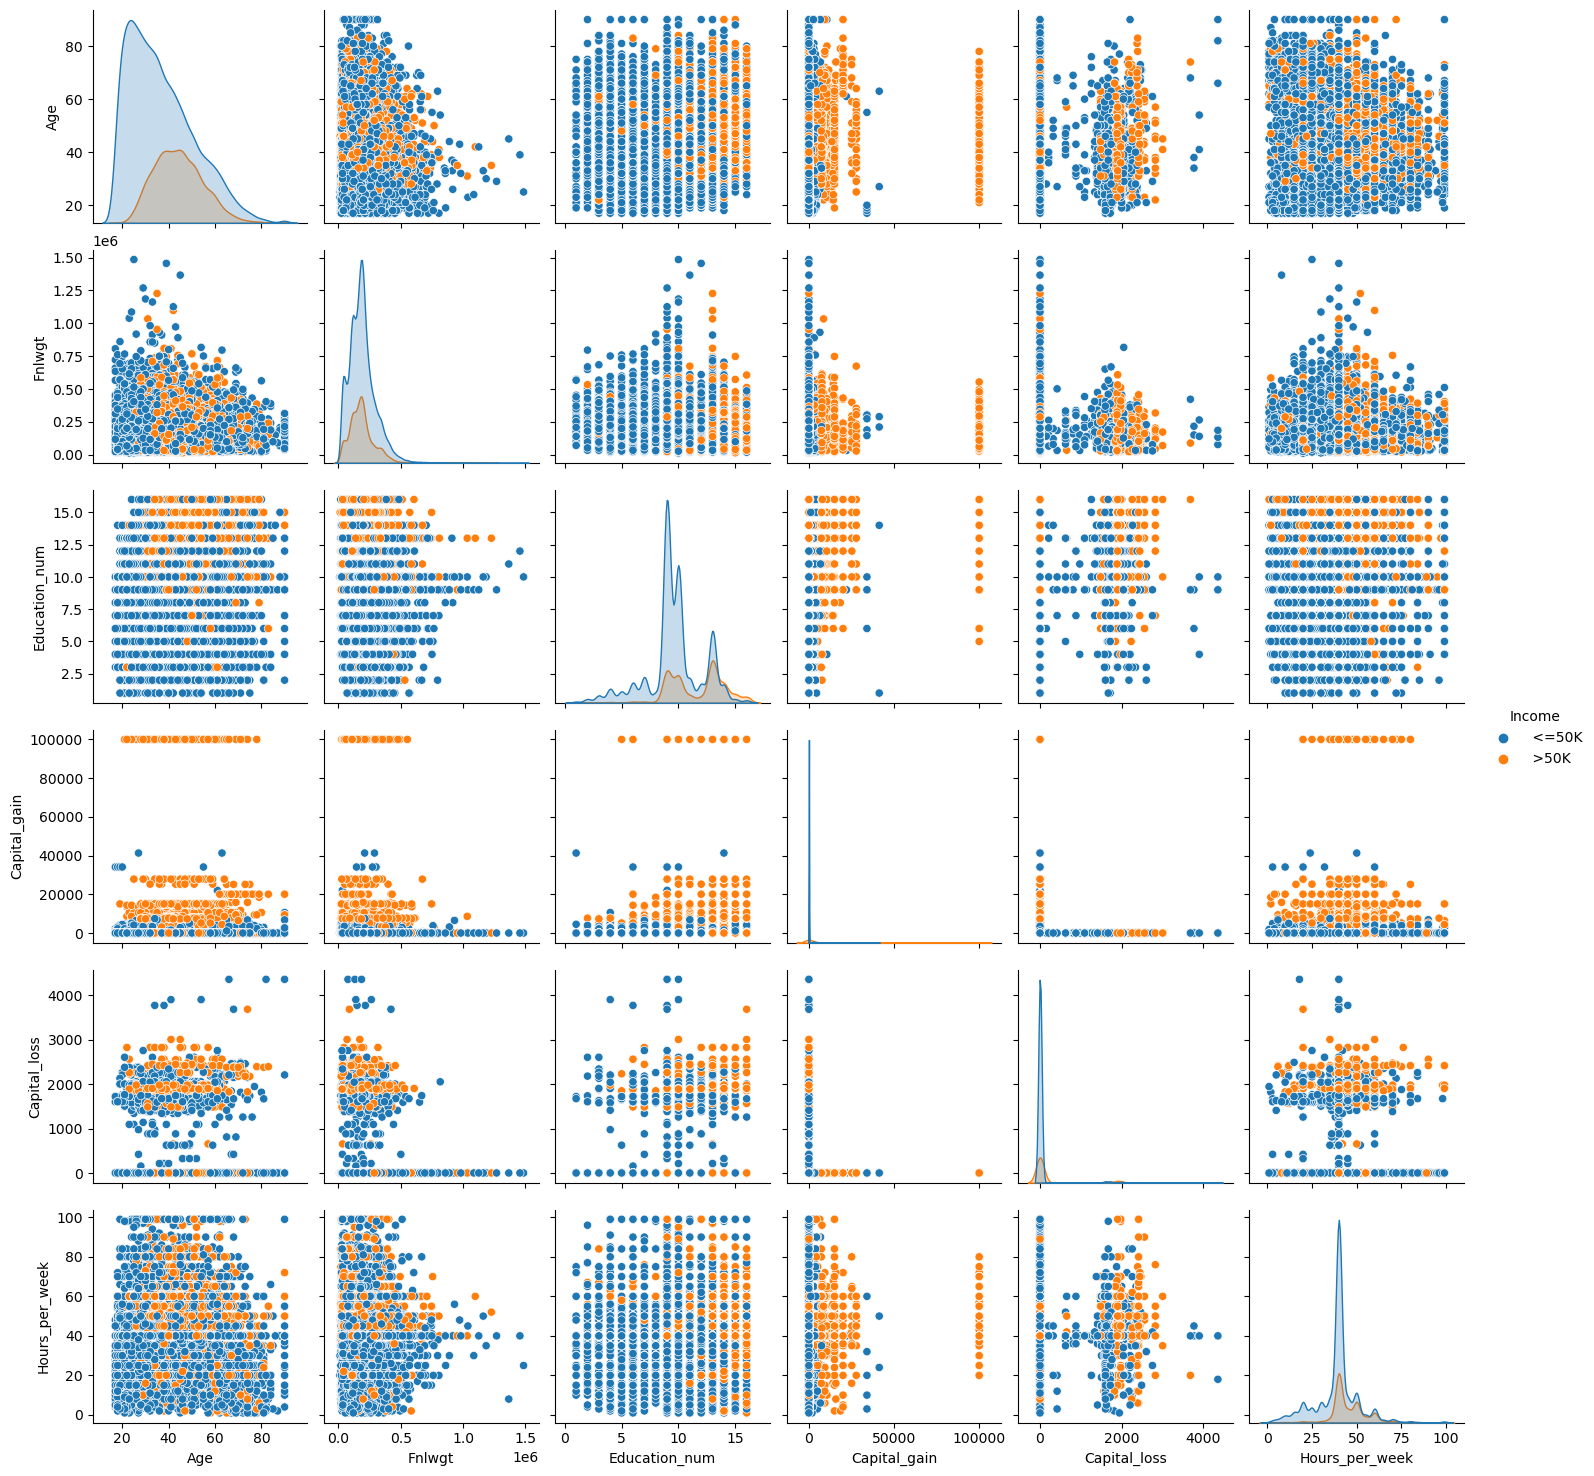

In [66]:
sns.pairplot(df,hue='Income')

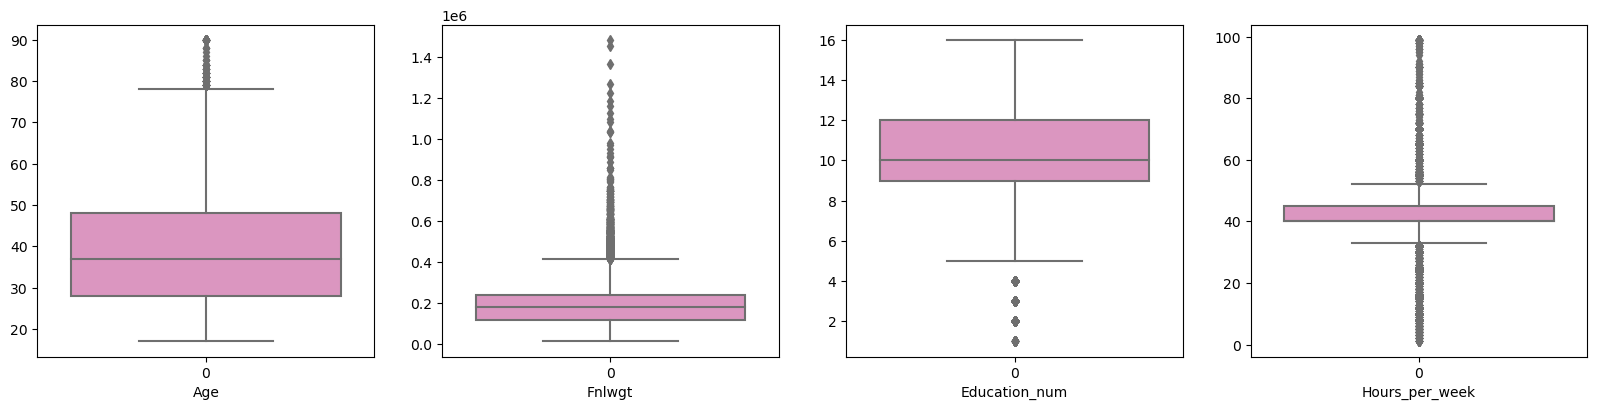

In [71]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [72]:
features = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
from scipy.stats import zscore
z=np.abs(zscore(features))
df = df[(z<3).all(axis=1)]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-Sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-Sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-Sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-Sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [74]:
data_loss =(32536-31442)/32536*100
data_loss

3.362429309073027

In [75]:
df.skew()

Age               0.472290
Fnlwgt            0.635776
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [76]:
df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])

In [77]:
df.skew()

Age               0.472290
Fnlwgt           -0.376071
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [78]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)
df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,5,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,3,0,5,0,2,1,38,0
3,1,5,0,10,5,2,0,4,0
4,1,2,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,4,0,13,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


In [79]:
cor = df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083536,-0.062253,-0.068466,0.053365,-0.475796,0.001943,-0.268033,0.030646,0.091687,0.097148,-0.001043,0.248289
Workclass,-0.083536,1.000000,0.021746,-0.049979,-0.161486,0.034160,-0.008464,0.001060,0.051647,0.036162,-0.006252,-0.031671,-0.062902
Fnlwgt,-0.062253,0.021746,1.000000,-0.006284,-0.032176,0.030134,0.001506,0.009055,-0.006969,0.023444,-0.015896,-0.061287,-0.002881
Education,-0.068466,-0.049979,-0.006284,1.000000,0.310297,0.052854,0.044624,0.000097,0.005978,-0.028756,-0.011756,-0.009202,0.085803
Education_num,0.053365,-0.161486,-0.032176,0.310297,1.000000,-0.071555,0.098145,-0.102662,0.030889,0.016791,0.160668,0.054542,0.337717
Marital_status,-0.475796,0.034160,0.030134,0.052854,-0.071555,1.000000,-0.005238,0.451147,-0.081674,-0.336218,-0.241632,0.009284,-0.425838
Occupation,0.001943,-0.008464,0.001506,0.044624,0.098145,-0.005238,1.000000,-0.043045,-0.000515,0.048700,-0.008613,-0.001136,0.047967
Relationship,-0.268033,0.001060,0.009055,0.000097,-0.102662,0.451147,-0.043045,1.000000,-0.115150,-0.583051,-0.263300,-0.010984,-0.251529
Race,0.030646,0.051647,-0.006969,0.005978,0.030889,-0.081674,-0.000515,-0.115150,1.000000,0.088781,0.045393,0.122130,0.072467
Sex,0.091687,0.036162,0.023444,-0.028756,0.016791,-0.336218,0.048700,-0.583051,0.088781,1.000000,0.238892,0.002130,0.216677


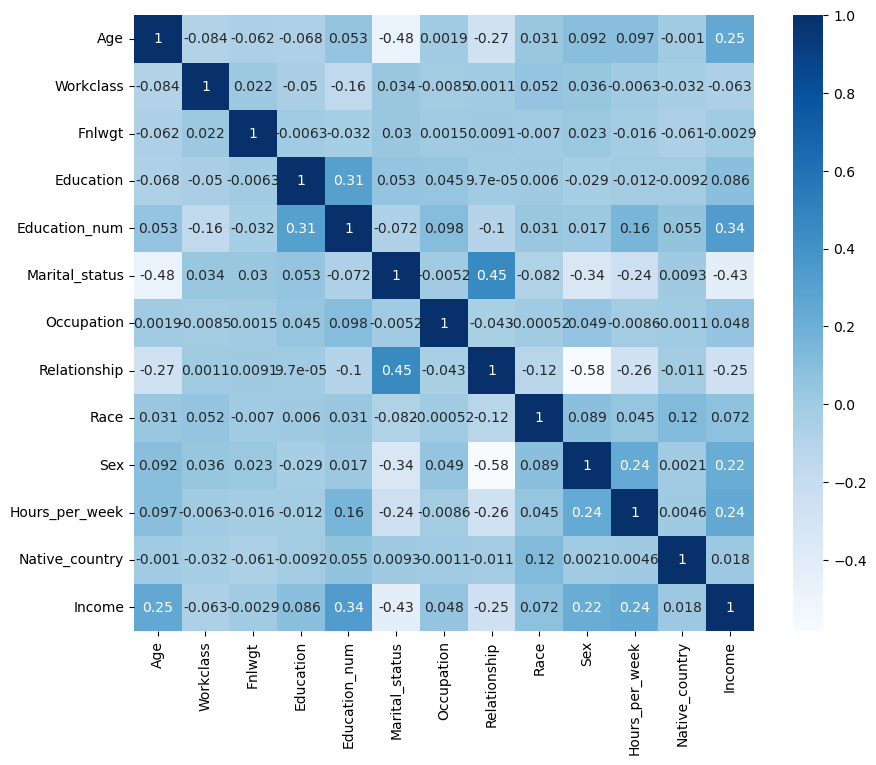

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap='Blues')
plt.yticks(rotation=0);

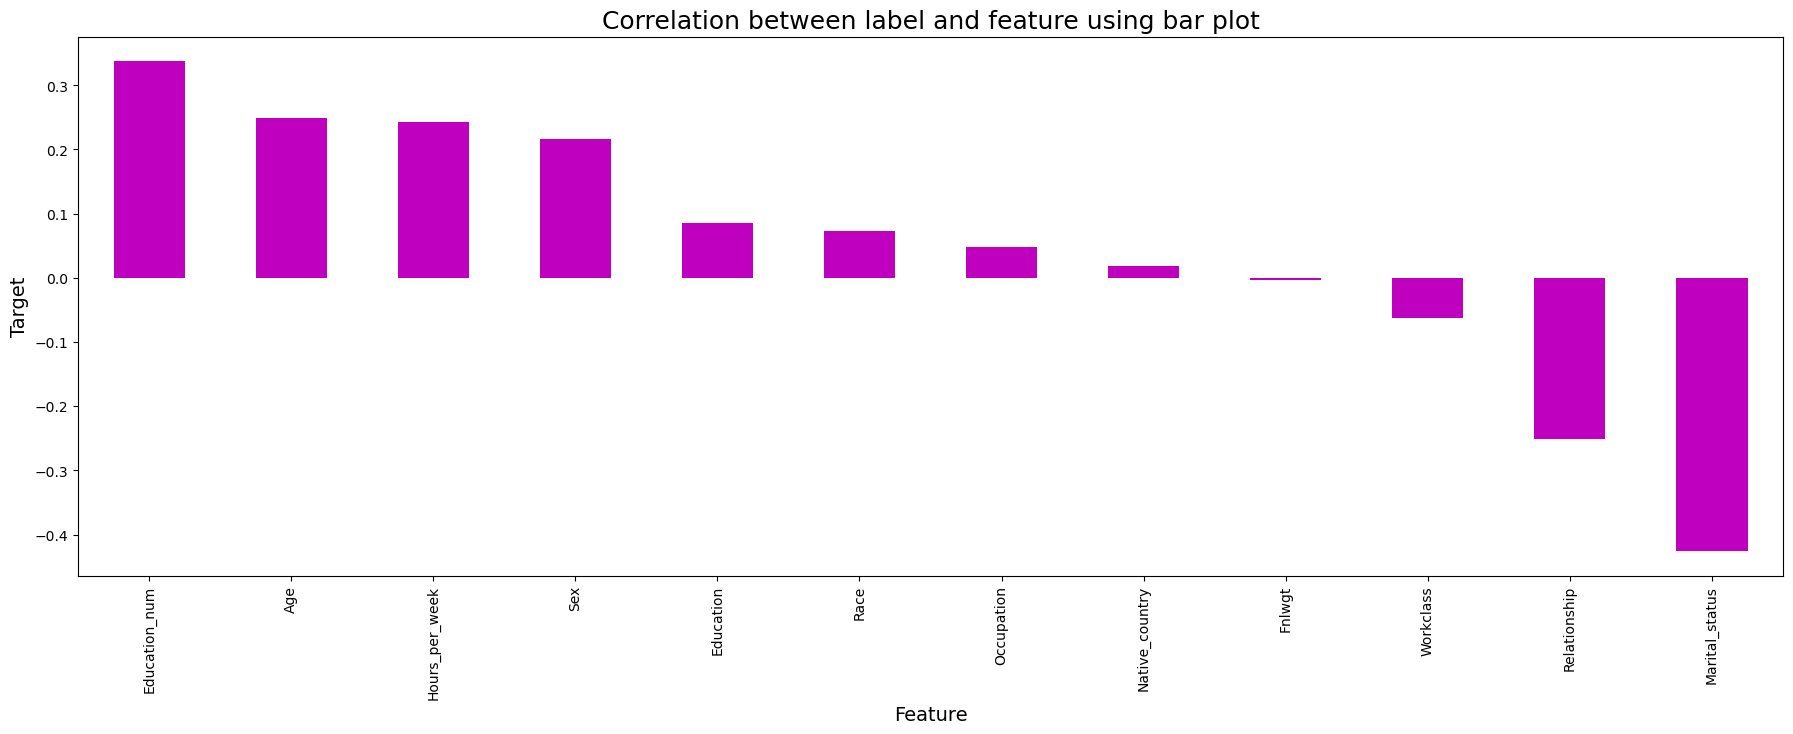

In [81]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the above correlation graph we can see that Education_num is positively correlated with the target and Martial_status is negatively correlated with the target and column Fnlwgt is very less correlated with the target

In [82]:
x = df.drop('Income', axis=1)
y =df['Income']

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.874757,0.39224,-1.102153,1.245549,1.154199,-0.990171,-0.792632,-0.903169,0.391337,0.706618,-2.424850,0.254026
1,-0.025630,0.39224,0.464909,-1.277454,-0.459834,0.147480,-0.334996,-0.282026,0.391337,0.706618,-0.008621,0.254026
2,1.099853,0.39224,0.630196,0.236348,-1.266850,-0.990171,-0.334996,-0.903169,-1.969449,0.706618,-0.008621,0.254026
3,-0.775952,0.39224,1.399742,1.245549,1.154199,-0.990171,0.809093,2.202549,-1.969449,-1.415192,-0.008621,-5.456787
4,-0.100662,0.39224,1.023655,-0.268253,1.557707,-0.990171,-0.792632,2.202549,0.391337,-1.415192,-0.008621,0.254026
...,...,...,...,...,...,...,...,...,...,...,...,...
31437,-0.850984,0.39224,0.814668,0.740949,0.750690,-0.990171,1.495547,2.202549,0.391337,-1.415192,-0.187601,0.254026
31438,0.124435,0.39224,-0.143249,-1.277454,-0.459834,-0.990171,-0.106178,-0.903169,0.391337,0.706618,-0.008621,0.254026
31439,1.475014,0.39224,-0.170849,-1.277454,-0.459834,0.147480,-1.479085,1.581405,0.391337,-1.415192,-0.008621,0.254026
31440,-1.226145,0.39224,0.335829,-1.277454,-0.459834,1.285131,-1.479085,0.960262,0.391337,0.706618,-1.798420,0.254026


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.339656,Age
1,1.039777,Workclass
2,1.009636,Fnlwgt
3,1.122009,Education
4,1.193531,Education_num
5,1.578339,Marital_status
6,1.014179,Occupation
7,1.773186,Relationship
8,1.034638,Race
9,1.587042,Sex


As we can see that all the columns are under vif range so our data is free from multicollinearity

In [85]:
y.value_counts()

0    23836
1     7606
Name: Income, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [87]:
y.value_counts()

0    23836
1    23836
Name: Income, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [89]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  80.31044609145574 on Random_state  188


In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [91]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8835827157040973
Confusion Matrix:  [[6092  975]
 [ 690 6545]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.86      0.88      7067
           1       0.87      0.90      0.89      7235

    accuracy                           0.88     14302
   macro avg       0.88      0.88      0.88     14302
weighted avg       0.88      0.88      0.88     14302



In [92]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8031044609145574
Confusion Matrix:  [[5375 1692]
 [1124 6111]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.76      0.79      7067
           1       0.78      0.84      0.81      7235

    accuracy                           0.80     14302
   macro avg       0.81      0.80      0.80     14302
weighted avg       0.80      0.80      0.80     14302



In [93]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8415606208921829
Confusion Matrix:  [[5355 1712]
 [ 554 6681]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.76      0.83      7067
           1       0.80      0.92      0.86      7235

    accuracy                           0.84     14302
   macro avg       0.85      0.84      0.84     14302
weighted avg       0.85      0.84      0.84     14302



In [94]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8519088239407075
Confusion Matrix:  [[5718 1349]
 [ 769 6466]]
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.81      0.84      7067
           1       0.83      0.89      0.86      7235

    accuracy                           0.85     14302
   macro avg       0.85      0.85      0.85     14302
weighted avg       0.85      0.85      0.85     14302



In [95]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8324010627884212
Confusion Matrix:  [[5843 1224]
 [1173 6062]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83      7067
           1       0.83      0.84      0.83      7235

    accuracy                           0.83     14302
   macro avg       0.83      0.83      0.83     14302
weighted avg       0.83      0.83      0.83     14302



In [97]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.81101206 0.85422129 0.90885253 0.91692889 0.91105517]
0.8804139871334001
Difference between accuracy score and cross validation score is:  -0.04801292434497895


In [98]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.78793917 0.79695857 0.79494441 0.79641284 0.7950493 ]
0.7942608580292606
Difference between accuracy score and cross validation score is:  0.03814020475916058


In [99]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.82779234 0.83786051 0.8550451  0.85861129 0.85808685]
0.8474792185261613
Difference between accuracy score and cross validation score is:  -0.015078155737740073


In [100]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.80471945 0.83072889 0.86343612 0.86972939 0.86217747]
0.8461582662398115
Difference between accuracy score and cross validation score is:  -0.01375720345139031


In [101]:
score4=cross_val_score(DTC,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.73654955 0.79622444 0.87350535 0.87151248 0.87067338]
0.8296930401931915
Difference between accuracy score and cross validation score is:  0.002708022595229731


Since the difference between the accuracy score and cross validation score is minimum for GradientBoostingClassifer i choose it as the best working model

In [102]:
param_grid = {'loss':['log_loss'], 
              'learning_rate':[0.1],
              'n_estimators':[100], 
              'subsample':[1.0], 
              'criterion':['friedman_mse'], 
              'min_samples_split':[2], 
              'min_samples_leaf':[1], 
              'min_weight_fraction_leaf':[0.0],
              'max_depth':[3], 
              'min_impurity_decrease':[0.0],
              'init':[None], 
              'random_state':[None],
              'max_features':[None], 
              'verbose':[0], 
              'max_leaf_nodes':[None], 
              'warm_start':[False],
              'validation_fraction':[0.1], 
              'n_iter_no_change':[None], 
              'tol':[0.0001],
              'ccp_alpha':[0.0]
             }

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
GSCV=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=20)

In [105]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['friedman_mse'],
                         'init': [None], 'learning_rate': [0.1],
                         'loss': ['log_loss'], 'max_depth': [3],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_iter_no_change': [None],
                         'random_state': [None], 'subsample': [1.0],
                         'tol': [0.0001], 'validation_fraction': [0.1],
                         'verbose': [0], 'warm_start': [False]})

In [106]:
GSCV.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [109]:
final=GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.8519088239407075


As we can see that the accuracy remains the same so saving our model at 85.19%

In [110]:
import joblib
joblib.dump(final, "Census Income Prediction.pkl")

['Census Income Prediction.pkl']

In [111]:
model = joblib.load("Census Income Prediction.pkl")
prediction=final.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 0, 1])

In [112]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
14297,1,1
14298,1,1
14299,1,1
14300,0,0


In [113]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,14292,14293,14294,14295,14296,14297,14298,14299,14300,14301
Predicted,1,1,1,0,1,0,1,1,0,0,...,0,1,1,0,1,1,1,1,0,1
Original,1,1,1,0,0,0,1,1,0,0,...,0,1,0,0,1,1,1,1,0,1


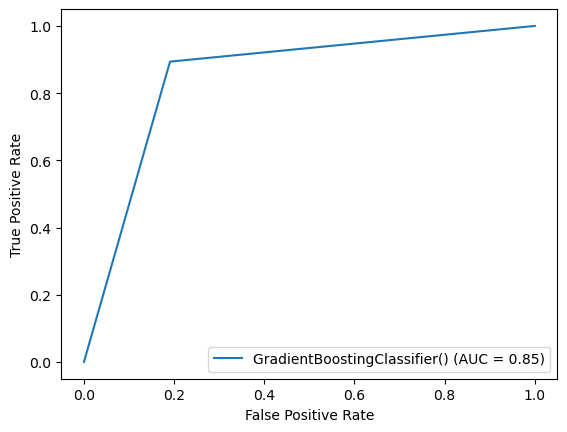

In [115]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

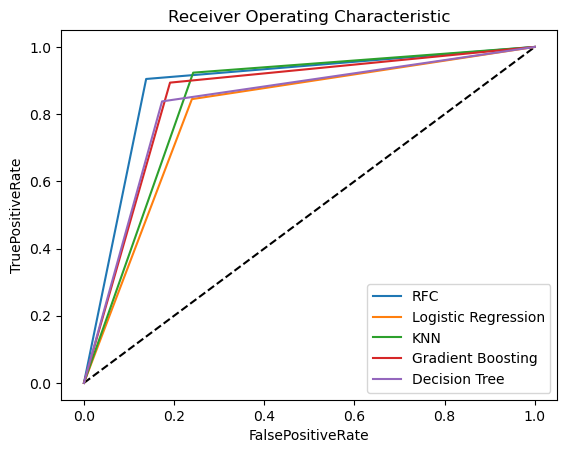

In [116]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = knn.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = DTC.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Decision Tree")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()